In [19]:
# Import relevant Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
sns.set()

In [20]:
# Import data into dataframe and check columns

df = pd.read_csv("train.csv")
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [21]:
# Check for missing values

df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Pre-processing

In [22]:
# Drop missing values

df1 = df[df.education.notnull()]
df2 = df.dropna()
df2.reset_index()
df2

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0


In [23]:
df2.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.000000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.356473,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.478962,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.000000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.000000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.000000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,1.000000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.000000,1.00000,99.000000,1.000000


In [24]:
#  is_promoted mean ~ 0.087, the dataset is skewed with more tha 91.3% of rows having is_promoted
# value of 0.

In [25]:
# Drop irrelevant columns

df2 = df2.drop(columns = ['employee_id','department','region','recruitment_channel'])
df2

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Master's & above,f,1,35,5.0,8,1,0,49,0
1,Bachelor's,m,1,30,5.0,4,0,0,60,0
2,Bachelor's,m,1,34,3.0,7,0,0,50,0
3,Bachelor's,m,2,39,1.0,10,0,0,50,0
4,Bachelor's,m,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...
54802,Bachelor's,m,2,31,1.0,2,0,0,49,0
54803,Bachelor's,m,1,48,3.0,17,0,0,78,0
54804,Master's & above,f,1,37,2.0,6,0,0,56,0
54805,Bachelor's,m,1,27,5.0,3,1,0,79,0


In [26]:
# Map strings to integer values

df2['gender'] = df2['gender'].map( {'f': 1, 'm': 0} ).astype(int)
df2['education'] = df2['education'].map({"Master's & above" : 1, "Bachelor's" : 0.5, "Below Secondary" : 0}).astype(float)
df2.head(25)
df3 = df2.copy()

In [27]:
# Import the MixMaxScaler 
# Transform the dataset to normalized dataset

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[['age', 'no_of_trainings','previous_year_rating','length_of_service', 'avg_training_score']] = scaler.fit_transform(df2[['age', 'no_of_trainings','previous_year_rating','length_of_service', 'avg_training_score']])


df2

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1.0,1,0.000000,0.375,1.00,0.194444,1,0,0.166667,0
1,0.5,0,0.000000,0.250,1.00,0.083333,0,0,0.350000,0
2,0.5,0,0.000000,0.350,0.50,0.166667,0,0,0.183333,0
3,0.5,0,0.111111,0.475,0.00,0.250000,0,0,0.183333,0
4,0.5,0,0.000000,0.625,0.50,0.027778,0,0,0.566667,0
...,...,...,...,...,...,...,...,...,...,...
54802,0.5,0,0.111111,0.275,0.00,0.027778,0,0,0.166667,0
54803,0.5,0,0.000000,0.700,0.50,0.444444,0,0,0.650000,0
54804,1.0,1,0.000000,0.425,0.25,0.138889,0,0,0.283333,0
54805,0.5,0,0.000000,0.175,1.00,0.055556,1,0,0.666667,0


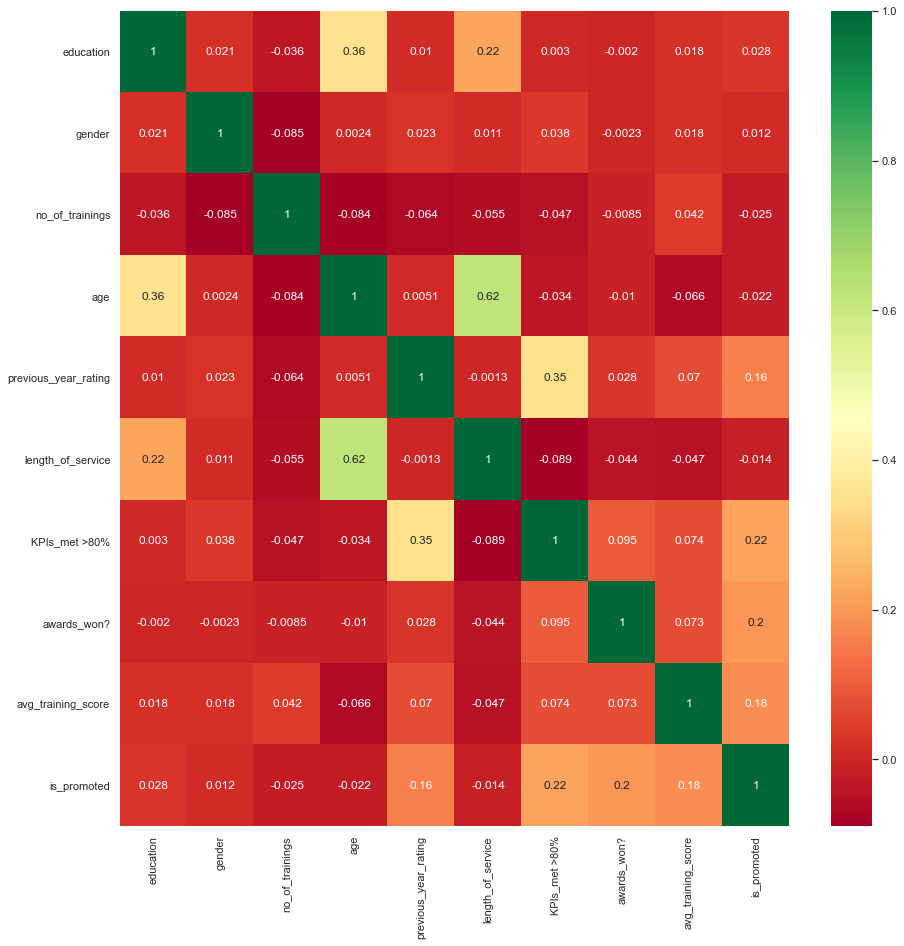

In [28]:
# Get correlations of each features in dataset

corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

# Plot heat map
sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
# Visualize coerrelations in data table

pd.DataFrame.corr(df2, method ='pearson')

,education,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
education,1.000000,0.021494,-0.036286,0.355682,0.010256,0.224296,0.002989,-0.001961,0.018249,0.027547
gender,0.021494,1.000000,-0.085456,0.002446,0.022828,0.011082,0.038172,-0.002275,0.017835,0.011909
no_of_trainings,-0.036286,-0.085456,1.000000,-0.083590,-0.064236,-0.055440,-0.046673,-0.008528,0.042033,-0.025006
age,0.355682,0.002446,-0.083590,1.000000,0.005068,0.620348,-0.033886,-0.010335,-0.066214,-0.022412
previous_year_rating,0.010256,0.022828,-0.064236,0.005068,1.000000,-0.001252,0.352434,0.027920,0.070041,0.158715
length_of_service,0.224296,0.011082,-0.055440,0.620348,-0.001252,1.000000,-0.089081,-0.043750,-0.047461,-0.014267
KPIs_met >80%,0.002989,0.038172,-0.046673,-0.033886,0.352434,-0.089081,1.000000,0.095208,0.074114,0.219933
awards_won?,-0.001961,-0.002275,-0.008528,-0.010335,0.027920,-0.043750,0.095208,1.000000,0.073132,0.196971
avg_training_score,0.018249,0.017835,0.042033,-0.066214,0.070041,-0.047461,0.074114,0.073132,1.000000,0.179494
is_promoted,0.027547,0.011909,-0.025006,-0.022412,0.158715,-0.014267,0.219933,0.196971,0.179494,1.000000


In [30]:
# df2 dataframe is for machine learning 

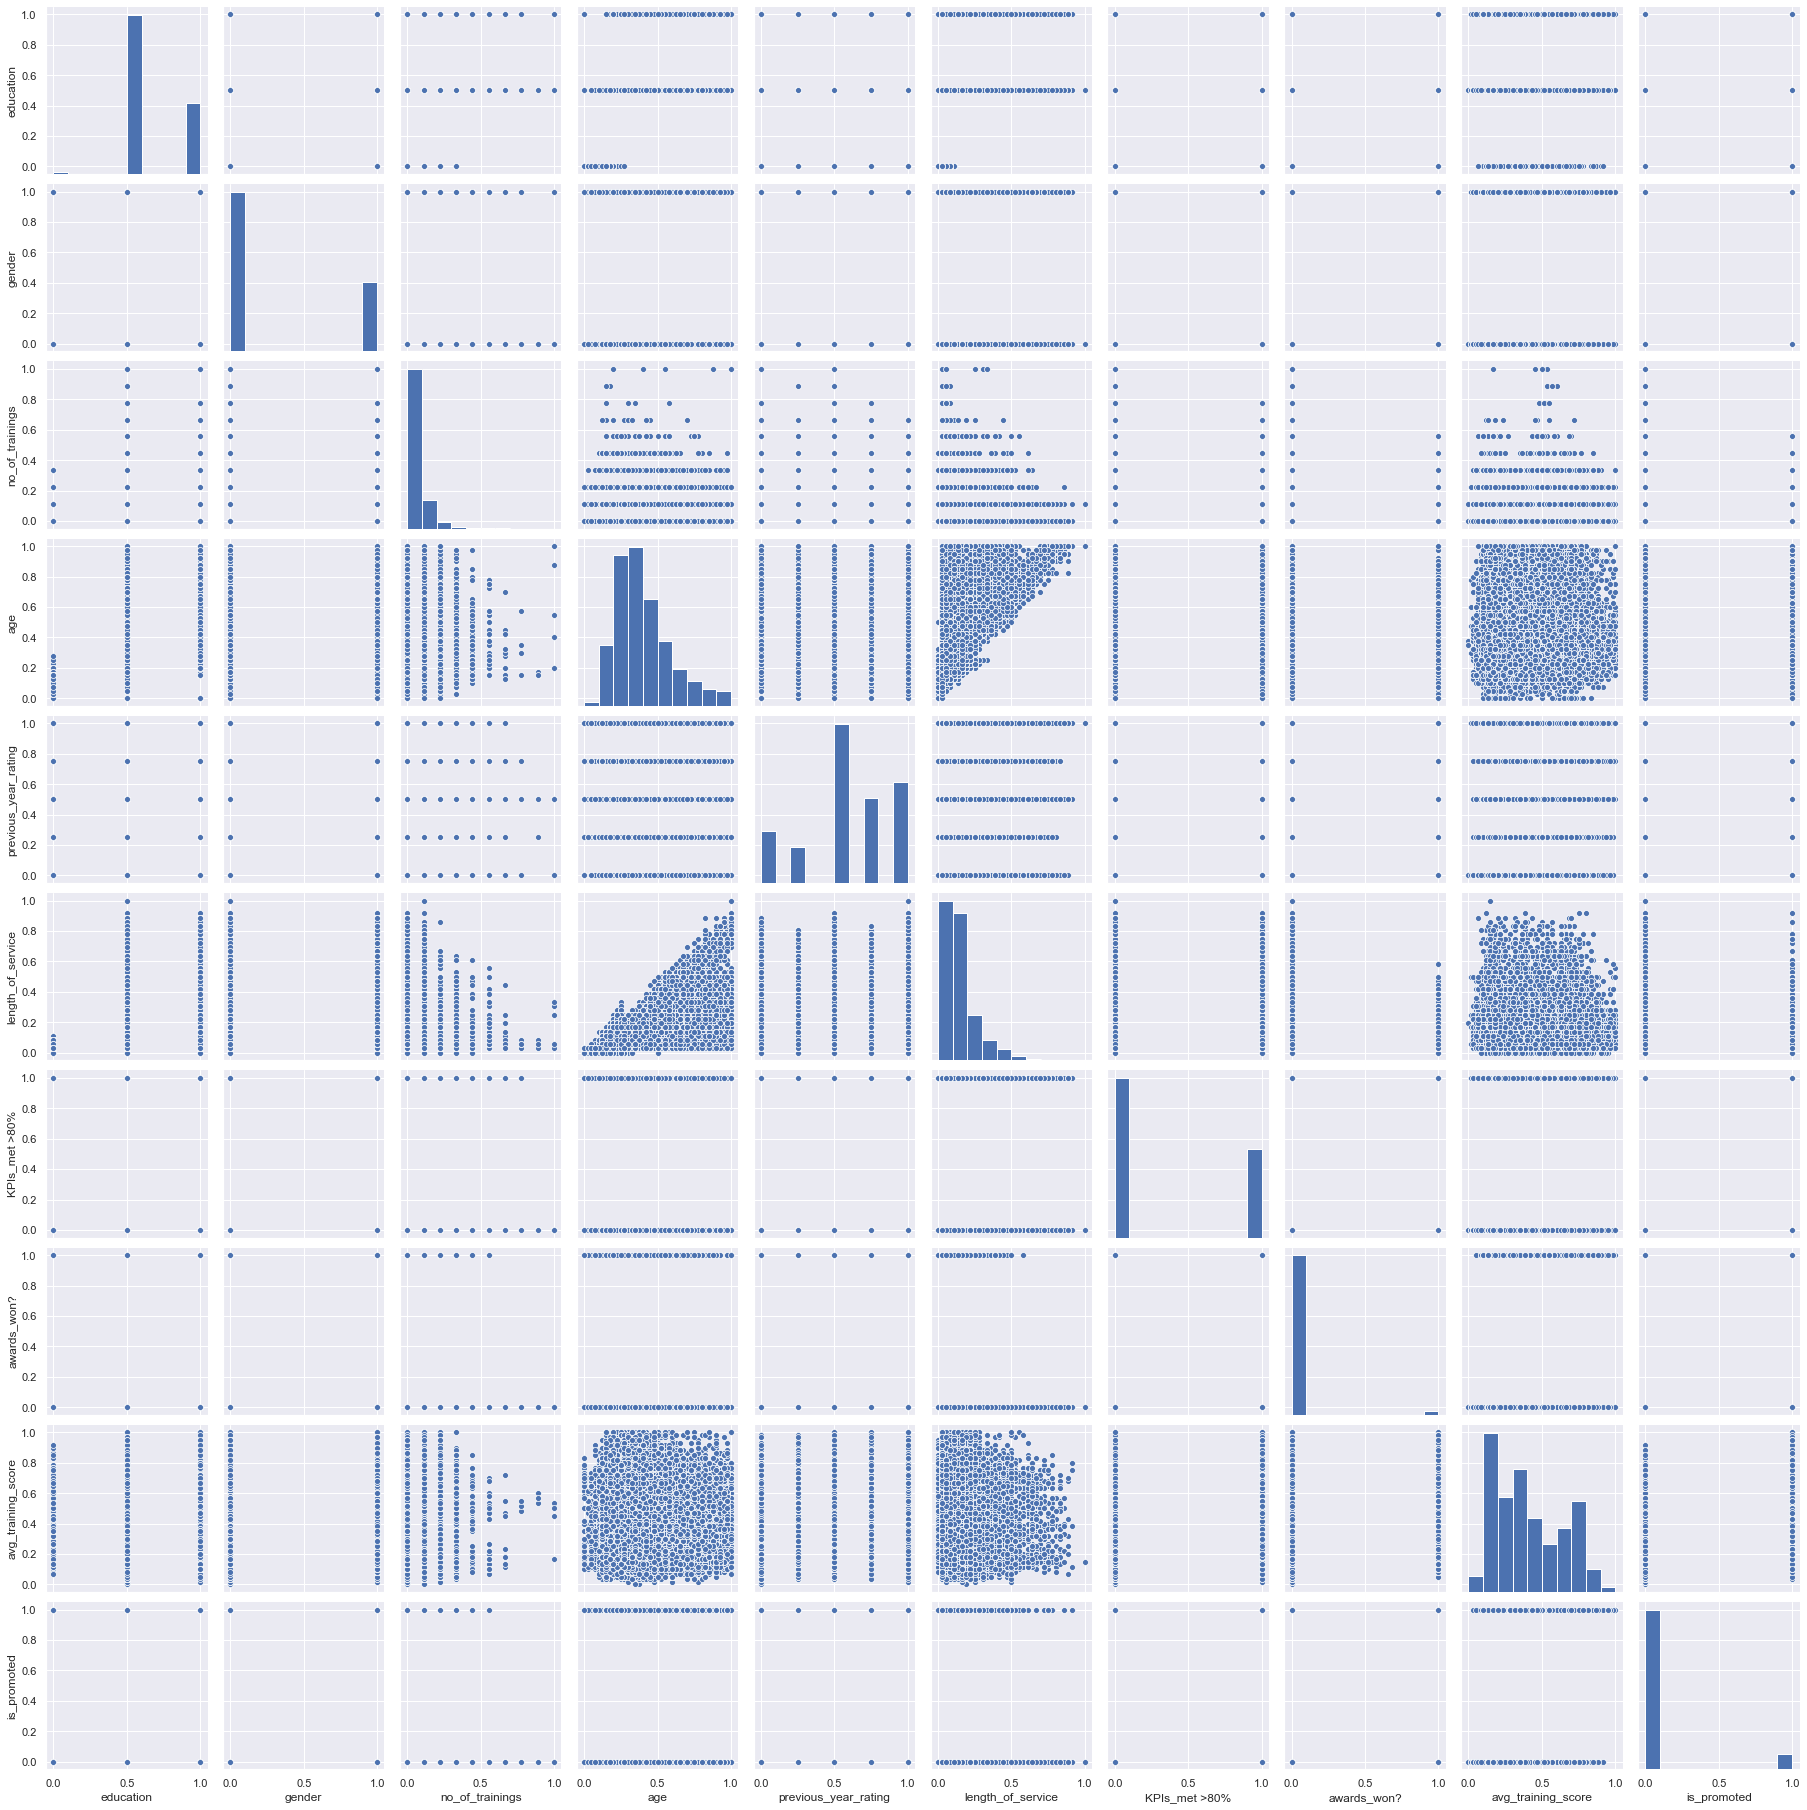

In [31]:
sns.pairplot(df2)

## Training set and testing set

In [32]:
X = df2.drop(['is_promoted'], axis = 1)
y = df2['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

(38928, 9)
(9732, 9)


## SVM Classification Model

In [33]:
svc= SVC()
svc.fit(X_train,y_train)

SVC()

In [34]:
y_pred = svc.predict(X_test)

In [35]:
confusion_mat_svm = confusion_matrix(y_test,y_pred)

In [36]:
confusion_svm = pd.DataFrame(confusion_mat_svm)

In [37]:
confusion_svm

,0,1
0,8852,13
1,797,70


In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

In [39]:
print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : {classification_report(y_test,y_pred)}")

Accuracy : 0.9168
f1_score : 0.1474
precision : 0.8434
recall : 0.0807
classification report :               precision    recall  f1-score   support

           0       0.92      1.00      0.96      8865
           1       0.84      0.08      0.15       867

    accuracy                           0.92      9732
   macro avg       0.88      0.54      0.55      9732
weighted avg       0.91      0.92      0.88      9732



## Parameter optimization for SVM

### Kernel optimization

In [40]:
Fscore = pd.DataFrame()
for n in range(4):
    svc_poly = SVC(kernel = 'poly', degree = n)
    svc_poly.fit(X_train,y_train)
    y_pred = svc_poly.predict(X_test)
    f_value = f1_score(y_test,y_pred)
    Fscore = Fscore.append({'polynomial_deg' : n, 'Fscore': f_value},ignore_index = True)

Fscore

,Fscore,polynomial_deg
0,0.000000,0.0
1,0.000000,1.0
2,0.156576,2.0
3,0.140426,3.0


In [41]:
Fscore = pd.DataFrame(columns = ['Kernel_type','F_score'])
kernel_type = ['rbf','sigmoid']
for name in kernel_type:
    clf1 = SVC(kernel = name)
    clf1.fit(X_train,y_train)
    y_pred = clf1.predict(X_test)
    f_value = f1_score(y_test,y_pred)
    Fscore = Fscore.append({'Kernel_type' : name, 'F_score': f_value},ignore_index = True)
Fscore

,Kernel_type,F_score
0,rbf,0.147368
1,sigmoid,0.060096


## Neural Network MLP classifier

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [43]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

mlp = MLPClassifier(hidden_layer_sizes=(100, 50, 10), max_iter=1000)
mlp.fit(X_train, y_train.values.ravel())

predictions = mlp.predict(X_test)

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(f1_score(y_test, y_pred))
print(precision_score(y_test, y_pred))

[[8739  126]
 [ 659  208]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8865
           1       0.62      0.24      0.35       867

    accuracy                           0.92      9732
   macro avg       0.78      0.61      0.65      9732
weighted avg       0.90      0.92      0.90      9732

0.06009615384615385
0.06273525721455459


In [44]:
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

## Logistic Regression Model

In [45]:
X = df2.drop(['is_promoted'], axis = 1)
y = df2['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)

LogR = LogisticRegression()
LogR.fit(X_train,y_train)

y_pred=LogR.predict(X_test)

confusion_LogR = pd.DataFrame(confusion_matrix(y_test,y_pred))
print(confusion_LogR) 


(38928, 9)
(9732, 9)
      0   1
0  8837  28
1   808  59


## Kmeans Clustering Model

In [46]:
kmeans = KMeans(n_clusters=2).fit(X_train)
y_pred = kmeans.predict(X_test)

confusion_kmeans = pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_kmeans   

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : {classification_report(y_test,y_pred)}")

Accuracy : 0.6777
f1_score : 0.2784
precision : 0.1739
recall : 0.6978
classification report :               precision    recall  f1-score   support

           0       0.96      0.68      0.79      8865
           1       0.17      0.70      0.28       867

    accuracy                           0.68      9732
   macro avg       0.57      0.69      0.54      9732
weighted avg       0.89      0.68      0.75      9732



## K Nearest Neighbour Model

In [47]:


KNN = KNeighborsClassifier()

KNN.fit(X_train,y_train)

y_pred=KNN.predict(X_test)

confusion_KNN = pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_KNN 

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : {classification_report(y_test,y_pred)}")

Accuracy : 0.9132
f1_score : 0.2881
precision : 0.5344
recall : 0.1972
classification report :               precision    recall  f1-score   support

           0       0.93      0.98      0.95      8865
           1       0.53      0.20      0.29       867

    accuracy                           0.91      9732
   macro avg       0.73      0.59      0.62      9732
weighted avg       0.89      0.91      0.89      9732



## Naive Bayes Model

In [48]:


NB = GaussianNB()

NB.fit(X_train,y_train)

y_pred=NB.predict(X_test)

confusion_NB = pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_NB 

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : {classification_report(y_test,y_pred)}")

Accuracy : 0.9098
f1_score : 0.2104
precision : 0.4776
recall : 0.1349
classification report :               precision    recall  f1-score   support

           0       0.92      0.99      0.95      8865
           1       0.48      0.13      0.21       867

    accuracy                           0.91      9732
   macro avg       0.70      0.56      0.58      9732
weighted avg       0.88      0.91      0.89      9732



## Random Forest Model

In [49]:


RF = RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)

y_pred=RF.predict(X_test)

confusion_RF = pd.DataFrame(confusion_matrix(y_test,y_pred))
confusion_RF 

print(f"Accuracy : {accuracy_score(y_test,y_pred):.4f}")
print(f"f1_score : {f1_score(y_test,y_pred):.4f}")
print(f"precision : {precision_score(y_test,y_pred):.4f}")
print(f"recall : {recall_score(y_test,y_pred):.4f}")
print(f"classification report : \n{classification_report(y_test,y_pred)}")


Accuracy : 0.9120
f1_score : 0.3152
precision : 0.5144
recall : 0.2272
classification report : 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      8865
           1       0.51      0.23      0.32       867

    accuracy                           0.91      9732
   macro avg       0.72      0.60      0.63      9732
weighted avg       0.89      0.91      0.90      9732

